In [1]:
import math
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [12]:
# 0. Cargar los datos de estatura y peso
url = 'http://wiki.stat.ucla.edu/socr/index.php?title=SOCR_Data_Dinov_020108_HeightsWeights&oldid=12529'

height_weight_df = pd.read_html(url)[1][['Height(Inches)','Weight(Pounds)']]

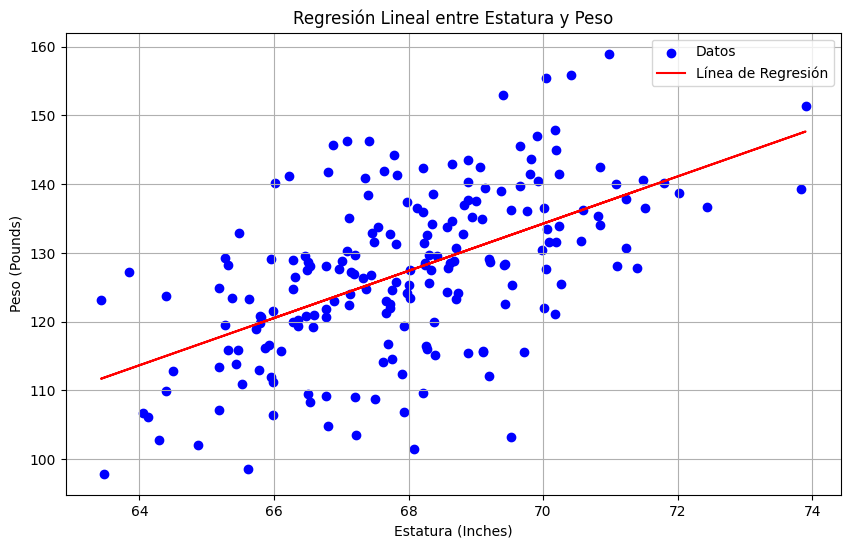

(200,
 -106.02770644878126,
 0.5568647346122992,
 1.1029015151266464e-17,
 'El valor p es menor a 0.05, indicando que hay una relación estadísticamente significativa entre estatura y peso.')

In [20]:
# 1. Count records in the dataframe
count = height_weight_df.shape[0]

# 2. Crear una regresion lineal con estatura como variable explicatoria y peso como variable explicada
X = height_weight_df[['Height(Inches)']]
y = height_weight_df['Weight(Pounds)']

# Crear el modelo de regresión lineal
model = linear_model.LinearRegression()
model.fit(X, y)

# 3. Hallar el intercepto
intercept = model.intercept_

# 4. Hacer la grafica
plt.figure(figsize=(10, 6))
plt.scatter(height_weight_df['Height(Inches)'], height_weight_df['Weight(Pounds)'], color='blue', label='Datos')
plt.plot(height_weight_df['Height(Inches)'], model.predict(X), color='red', label='Línea de Regresión')
plt.xlabel('Estatura (Inches)')
plt.ylabel('Peso (Pounds)')
plt.title('Regresión Lineal entre Estatura y Peso')
plt.legend()
plt.grid(True)
plt.show()

# 5. Hallar correlacion y valor p
correlation, p_value = pearsonr(height_weight_df['Height(Inches)'], height_weight_df['Weight(Pounds)'])

# 6. Interpretar el valor p
# Normalmente se interpreta el valor p para determinar la significancia estadística
interpretation = "El valor p es menor a 0.05, indicando que hay una relación estadísticamente significativa entre estatura y peso." if p_value < 0.05 else "El valor p es mayor a 0.05, indicando que no hay una relación estadísticamente significativa entre estatura y peso."

count, intercept, correlation, p_value, interpretation